<a href="https://colab.research.google.com/github/devashishk99/DL-Fundamentals-Lightning-AI/blob/main/Unit%204/exercise_1_changing_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing a Multilayer Perceptron (MNIST)

## 1) Installing Libraries

In [ ]:
# !conda install numpy pandas matplotlib --yes

In [ ]:
# !pip install torch torchvision torchaudio

In [ ]:
# !conda install watermark

In [ ]:
%load_ext watermark
%watermark -v -p numpy,pandas,matplotlib,torch

Python implementation: CPython
Python version       : 3.10.9
IPython version      : 8.7.0

numpy     : 1.23.5
pandas    : not installed
matplotlib: 3.6.3
torch     : 1.13.1



## 2) Loading the dataset

- MNIST website: http://yann.lecun.com/exdb/mnist/

In [1]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

train_dataset = datasets.MNIST(
    root="./mnist", train=True, transform=transforms.ToTensor(), download=True
)

test_dataset = datasets.MNIST(
    root="./mnist", train=False, transform=transforms.ToTensor()
)

100%|██████████| 9912422/9912422 [00:00<00:00, 95772074.99it/s]

Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 29063266.27it/s]

Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 23009942.73it/s]

Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 7224318.84it/s]


Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



In [2]:
len(train_dataset)

60000

In [3]:
len(test_dataset)

10000

### Create a validation set

In [4]:
import torch
from torch.utils.data.dataset import random_split

torch.manual_seed(1)
train_dataset, val_dataset = random_split(train_dataset, lengths=[55000, 5000])

In [5]:
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=64,
    shuffle=True,
)

val_loader = DataLoader(
    dataset=val_dataset,
    batch_size=64,
    shuffle=False,
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=64,
    shuffle=False,
)

## 3) Implementing the model

In [18]:
import torch

class PyTorchMLP(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super().__init__()

        self.all_layers = torch.nn.Sequential(
            # 1st hidden layer
            torch.nn.Linear(num_features, 50),
            torch.nn.ReLU(),
            # output layer
            torch.nn.Linear(50, num_classes),
        )

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        logits = self.all_layers(x)
        return logits

## 4) The training loop

In [7]:
def compute_accuracy(model, dataloader):

    model = model.eval()

    correct = 0.0
    total_examples = 0

    for idx, (features, labels) in enumerate(dataloader):

        with torch.no_grad():
            logits = model(features)

        predictions = torch.argmax(logits, dim=1)

        compare = labels == predictions
        correct += torch.sum(compare)
        total_examples += len(compare)

    return correct / total_examples

In [23]:
import torch.nn.functional as F

torch.manual_seed(1)
model = PyTorchMLP(num_features=784, num_classes=10)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

num_epochs = 10

loss_list = []
train_acc_list, val_acc_list = [], []
for epoch in range(num_epochs):

    model = model.train()
    for batch_idx, (features, labels) in enumerate(train_loader):

        logits = model(features)

        loss = F.cross_entropy(logits, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if not batch_idx % 250:
            ### LOGGING
            print(
                f"Epoch: {epoch+1:03d}/{num_epochs:03d}"
                f" | Batch {batch_idx:03d}/{len(train_loader):03d}"
                f" | Train Loss: {loss:.2f}"
            )
        loss_list.append(loss.item())

    train_acc = compute_accuracy(model, train_loader)
    val_acc = compute_accuracy(model, val_loader)
    print(f"Train Acc {train_acc*100:.2f}% | Val Acc {val_acc*100:.2f}%")
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)

Epoch: 001/010 | Batch 000/860 | Train Loss: 2.32
Epoch: 001/010 | Batch 250/860 | Train Loss: 0.56
Epoch: 001/010 | Batch 500/860 | Train Loss: 0.35
Epoch: 001/010 | Batch 750/860 | Train Loss: 0.31
Train Acc 91.93% | Val Acc 91.88%
Epoch: 002/010 | Batch 000/860 | Train Loss: 0.31
Epoch: 002/010 | Batch 250/860 | Train Loss: 0.17
Epoch: 002/010 | Batch 500/860 | Train Loss: 0.17
Epoch: 002/010 | Batch 750/860 | Train Loss: 0.24
Train Acc 94.05% | Val Acc 93.18%
Epoch: 003/010 | Batch 000/860 | Train Loss: 0.34
Epoch: 003/010 | Batch 250/860 | Train Loss: 0.20
Epoch: 003/010 | Batch 500/860 | Train Loss: 0.08
Epoch: 003/010 | Batch 750/860 | Train Loss: 0.16
Train Acc 95.08% | Val Acc 94.44%
Epoch: 004/010 | Batch 000/860 | Train Loss: 0.33
Epoch: 004/010 | Batch 250/860 | Train Loss: 0.05
Epoch: 004/010 | Batch 500/860 | Train Loss: 0.12
Epoch: 004/010 | Batch 750/860 | Train Loss: 0.22
Train Acc 95.67% | Val Acc 94.68%
Epoch: 005/010 | Batch 000/860 | Train Loss: 0.16
Epoch: 005/010

## 7) Evaluating the results

In [24]:
train_acc = compute_accuracy(model, train_loader)
val_acc = compute_accuracy(model, val_loader)
test_acc = compute_accuracy(model, test_loader)

print(f"Train Acc {train_acc*100:.2f}%")
print(f"Val Acc {val_acc*100:.2f}%")
print(f"Test Acc {test_acc*100:.2f}%")

Train Acc 97.79%
Val Acc 96.48%
Test Acc 96.88%


In [11]:
import os

import matplotlib.pyplot as plt
import numpy as np
import torch


def plot_training_loss(
    minibatch_loss_list,
    num_epochs,
    iter_per_epoch,
    results_dir=None,
    averaging_iterations=100,
):

    plt.figure()
    ax1 = plt.subplot(1, 1, 1)
    ax1.plot(
        range(len(minibatch_loss_list)), (minibatch_loss_list), label="Minibatch Loss"
    )

    if len(minibatch_loss_list) > 1000:
        ax1.set_ylim([0, np.max(minibatch_loss_list[1000:]) * 1.5])
    ax1.set_xlabel("Iterations")
    ax1.set_ylabel("Loss")

    ax1.plot(
        np.convolve(
            minibatch_loss_list,
            np.ones(
                averaging_iterations,
            )
            / averaging_iterations,
            mode="valid",
        ),
        label="Running Average",
    )
    ax1.legend()

    ###################
    # Set scond x-axis
    ax2 = ax1.twiny()
    newlabel = list(range(num_epochs + 1))

    newpos = [e * iter_per_epoch for e in newlabel]

    ax2.set_xticks(newpos[::10])
    ax2.set_xticklabels(newlabel[::10])

    ax2.xaxis.set_ticks_position("bottom")
    ax2.xaxis.set_label_position("bottom")
    ax2.spines["bottom"].set_position(("outward", 45))
    ax2.set_xlabel("Epochs")
    ax2.set_xlim(ax1.get_xlim())
    ###################

    plt.tight_layout()

    if results_dir is not None:
        image_path = os.path.join(results_dir, "plot_training_loss.pdf")
        plt.savefig(image_path)


def plot_accuracy(train_acc_list, valid_acc_list, results_dir=None):

    num_epochs = len(train_acc_list)

    plt.plot(np.arange(1, num_epochs + 1), train_acc_list, label="Training")
    plt.plot(np.arange(1, num_epochs + 1), valid_acc_list, label="Validation")

    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()

    if results_dir is not None:
        image_path = os.path.join(results_dir, "plot_acc_training_validation.pdf")
        plt.savefig(image_path)


def show_examples(model, data_loader, unnormalizer=None, class_dict=None):

    fail_features, fail_targets, fail_predicted = [], [], []
    for batch_idx, (features, targets) in enumerate(data_loader):

        with torch.no_grad():
            logits = model(features)
            predictions = torch.argmax(logits, dim=1)

            mask = targets != predictions

            fail_features.extend(features[mask])
            fail_targets.extend(targets[mask])
            fail_predicted.extend(predictions[mask])

        if len(fail_targets) > 15:
            break

    fail_features = torch.cat(fail_features)
    fail_targets = torch.tensor(fail_targets)
    fail_predicted = torch.tensor(fail_predicted)

    fig, axes = plt.subplots(nrows=3, ncols=5, sharex=True, sharey=True)

    if unnormalizer is not None:
        for idx in range(fail_features.shape[0]):
            features[idx] = unnormalizer(fail_features[idx])

    if fail_features.ndim == 4:
        nhwc_img = np.transpose(fail_features, axes=(0, 2, 3, 1))
        nhw_img = np.squeeze(nhwc_img.numpy(), axis=3)

        for idx, ax in enumerate(axes.ravel()):
            ax.imshow(nhw_img[idx], cmap="binary")
            if class_dict is not None:
                ax.title.set_text(
                    f"P: {class_dict[fail_predicted[idx].item()]}"
                    f"\nT: {class_dict[fail_targets[idx].item()]}"
                )
            else:
                ax.title.set_text(f"P: {fail_predicted[idx]} | T: {fail_targets[idx]}")
            ax.axison = False

    else:

        for idx, ax in enumerate(axes.ravel()):
            ax.imshow(fail_features[idx], cmap="binary")
            if class_dict is not None:
                ax.title.set_text(
                    f"P: {class_dict[fail_predicted[idx].item()]}"
                    f"\nT: {class_dict[fail_targets[idx].item()]}"
                )
            else:
                ax.title.set_text(f"P: {fail_predicted[idx]} | T: {targets[idx]}")
            ax.axison = False
    plt.tight_layout()
    plt.show()

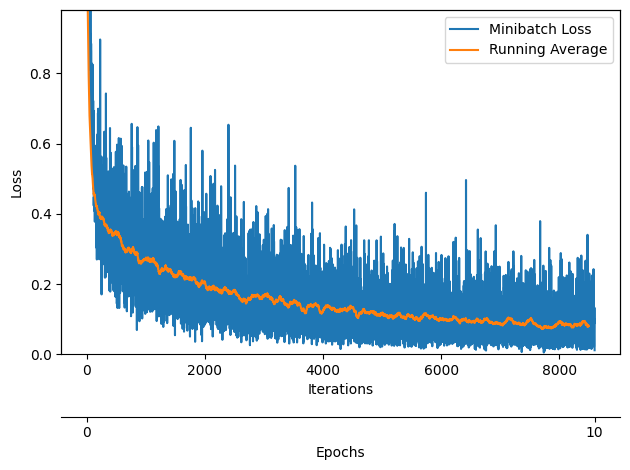

In [25]:
#from helper_plotting import plot_training_loss

plot_training_loss(minibatch_loss_list=loss_list,
                   num_epochs=num_epochs,
                   iter_per_epoch=len(loss_list)//num_epochs)

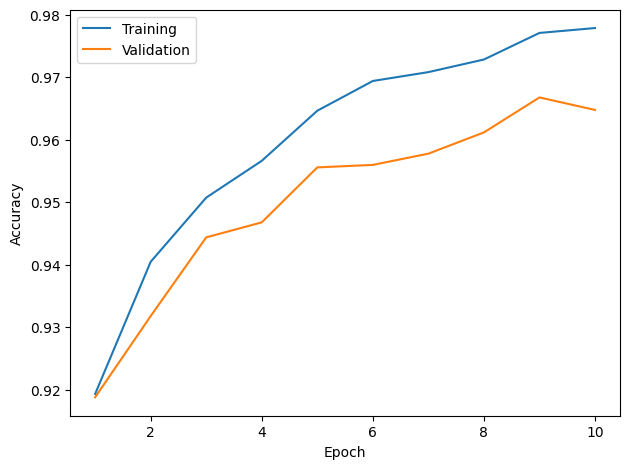

In [26]:
#from helper_plotting import plot_accuracy

plot_accuracy(train_acc_list=train_acc_list, valid_acc_list=val_acc_list)